### 서포트 벡터 머신 과제

In [1]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

### 1. 데이터 구성하기

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/유방암.csv", encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [5]:
# diagnosis 데이터를 0과 1로 변환
df_raw["diagnosis"] = df_raw["diagnosis"].map({"음성": 0, "양성": 1})
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [6]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (224, 30) Test (96, 30)


In [7]:
# 기본 옵션으로 모델 생성
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.884
Accuracy on test set: 0.896


In [8]:
# 현재 생성된 모델의 옵션 확인
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


#### scale 조정

스케일 조정을 통해서, 변수 간의 단위 차이를 제거하고 이상치의 영향을 감소 시킬 수 있다.

스케일 조정을 하기 전 기본 옵션으로 생성한 모델의 test accuracy는 0.896 이었지만, 스케일 조정을 진행한 후 기본 옵션으로 생성한 모델의 test accuracy는 0.958로 높은 수준의 개선이 이뤄진 것을 확인할 수 있다.

본 과제에서는 스케일 조정을 해준 후에 Cost와 Gammma의 파라미터 조정을 진행하였다.

In [9]:
# scale 변환
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [10]:
# 데이터 분할 (7:3)
df_scaled_train_x , df_scaled_test_x = train_test_split(df_scaled , test_size = 0.3 ,random_state = 1234)

print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (224, 30)
test data X size: (96, 30)


In [11]:
# scale 조정된 데이터로 새로운 모델 생성
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.991
Accuracy on test set: 0.958


### 2.  모델 생성

###### Cost 파라미터 조정

Cost가 커질수록 오류를 적게 허용하여 과적합의 문제가 발생할 수 있으며, Cost가 작아질수록 오류를 많이 허용하기 때문에 과소적합의 문제가 생길 수 있다.

해당 모델에서 Cost가 1.1 ~ 2.0 사이일 때 Test Accuracy가 0.906으로 가장 큰 것을 볼 수 있다. Test Accuracy가 가장 큰 상황에서 Train Accuracy와 격차가 가장 작은 경우는 Cost가 1.6~1.8 사이일 경우이다.

너무 비용이 커지면 과적합의 문제가 발생하므로, Cost는 1.6으로 선정한다.


In [12]:
train_accuracy = [] ; test_accuracy = []
para_c = [ c * 0.1 for c in range(1,21)]

for v_C in para_c:
    svm = SVC(C = v_C , random_state = 112)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [13]:
# 모델 정확도 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.866,0.854
1,0.2,0.879,0.865
2,0.3,0.879,0.885
3,0.4,0.884,0.885
4,0.5,0.879,0.875
5,0.6,0.884,0.896
6,0.7,0.884,0.896
7,0.8,0.884,0.896
8,0.9,0.884,0.896
9,1.0,0.884,0.896


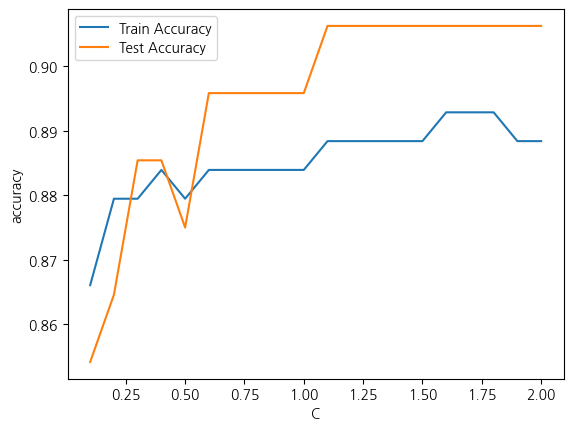

In [14]:
# 그래프 확인
plt.plot(para_c, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle ="-", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

###### Gamma 파라미터 조정

gamma값은 커질수록 모델 복잡도가 증가하고 과적합의 가능성이 올라간다. 반대로 낮아질수록 모델이 더 일반화되지만 과소적합의 위험이 존재한다. 

gamma에 대한 Train Accuracy와 Test Accuracy 비교해보면 모든 값에서 동일한 것을 확인할 수 있다. 

따라서, gamma의 영향이 크지 않다고 판단하여 값을 따로 설정하지 않기로 판단하였다.

In [15]:
train_accuracy = [] ; test_accuracy = []
para_gamma = [0.05 * gamma for gamma in range(1,15)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma , C = 1.6 ,random_state = 112)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [16]:
# 모델 정확도 확인
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,1.0,0.7604
1,0.10,1.0,0.7604
2,0.15,1.0,0.7604
3,0.20,1.0,0.7604
4,0.25,1.0,0.7604
5,0.30,1.0,0.7604
6,0.35,1.0,0.7604
7,0.40,1.0,0.7604
8,0.45,1.0,0.7604
9,0.50,1.0,0.7604


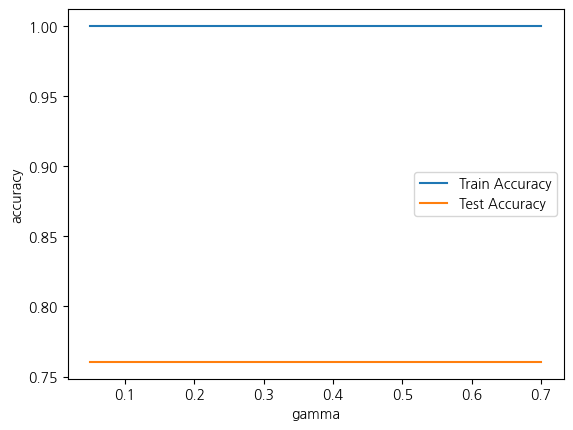

In [17]:
# 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle ="-", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

### 3. 최종 모델 선정

- 최종 모델

위에서 진행한 파라미터 선정 과정을 통해 gamma 값은 따로 지정하지 않았고 Cost는 1.6 으로 설정한 최종 모델을 만들었다. 해당 모델의 training accuracy는 0.991이고 test accuracy는 0.958으로 과적합 되지않고 성능이 괜찮은 것으로 나타났다.

해당 모델을 평가하기 위해 GridSearchCV로 모델을 만들어 비교해보았다. GridSearchCV를 통한 모델은 gamma = 0.05 , Cost = 1.3 으로 파라미터 값에서 차이를 확인할 수 있었다. 이 모델의 best score는 0.969로 직접 파라미터를 조정한 모델보다 더 나은 정확도를 확인할 수 있다.

GridSearchCV는 크로스 밸리데이션을 통해 나와서 더 나은 모델이 만들어졌을 것이라고 생각하며,
기존의 모델은 파라미터 튜닝이나 크로스 밸리데이션 과정을 통해서 조금 더 개선할 수 있을 것이라고 생각이 든다.

In [18]:
# 최종 모델 
svc_final = SVC( C = 1.6, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print("Accuracy on training set : {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 0.991
Accuracy on test set : 0.958

Confusion matrix: 
[[68  4]
 [ 0 24]]
              precision    recall  f1-score   support

           0      1.000     0.944     0.971        72
           1      0.857     1.000     0.923        24

    accuracy                          0.958        96
   macro avg      0.929     0.972     0.947        96
weighted avg      0.964     0.958     0.959        96



In [19]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = SVC(random_state = 1234)

param_grid = {"C": para_c,
             "gamma": para_gamma}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy" , n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest prameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=1.3, gamma=0.05, random_state=1234)

best prameter: 
{'C': 1.3, 'gamma': 0.05}

best score: 
0.969


### 4. 결론

서포트 벡터 머신을 사용하여 분류 모델을 만들고 검정한 결과, 높은 정확도를 가진 모델로 유방암의 음성/양성을 예측 해볼 수 있었다.

그러나 해당 기법으로는 유방암의 음성/양성 진단에 있어 주요한 변수를 찾는 것이 어려울 수 있다고 생각된다. 서포트 벡터의 가중치 또는 계수를 통해 변수의 중요도를 추정할 수는 있지만, 직접적이지 않을 수 있고, 해석이 어려울 수 있다.

주성분 분석을 활용한다면 변수들을 잘 조합하여 주요한 정보를 추출할 수 있고, 이를 SVM과 결합한다면 유방암 진단에 더 높은 효율을 가져올 수 있을 것으로 예상된다.